# <font color='white'> Import **Libraries**</font>

In [3]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# !pip install -q ydata_profiling
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, f1_score,
                             accuracy_score, precision_score, recall_score, 
                             precision_recall_curve, classification_report,
                             roc_curve, auc, roc_auc_score)

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from collections import Counter

# !pip install nbimporter
import nbimporter
from KernelPCA-PCA_functions import function_AD, split_data
from EDA import irisData, breastcancerData, vowelData

# <font color='white'>Anomaly Detection for each Dataset</font>

In [4]:
# Choose one of the functions to load the dataset

# df_, x ,y = irisData ()
df_, x, y = vowelData()
# df_, x ,y = breastcancerData()

In [5]:
X = scaler.fit_transform(x)

In [6]:
selected_class = 0
other_class = 1

# ONE VS ALL
y = np.where(y == selected_class, 0, 1)

# # ONE vs ONE
# mask = np.logical_or(y == selected_class, y == other_class)
# X = X[mask]
# y = y[mask]
# y = np.where(y == selected_class, 0, 1)

In [7]:
X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a = split_data(X, y, percentage=0.6)
# Train the model only with normal data.
contamination = 0.00000001

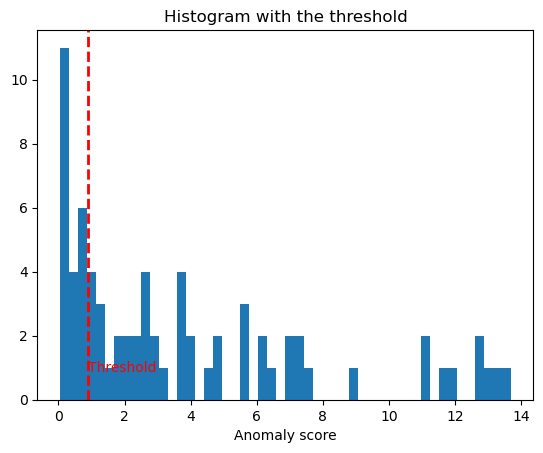

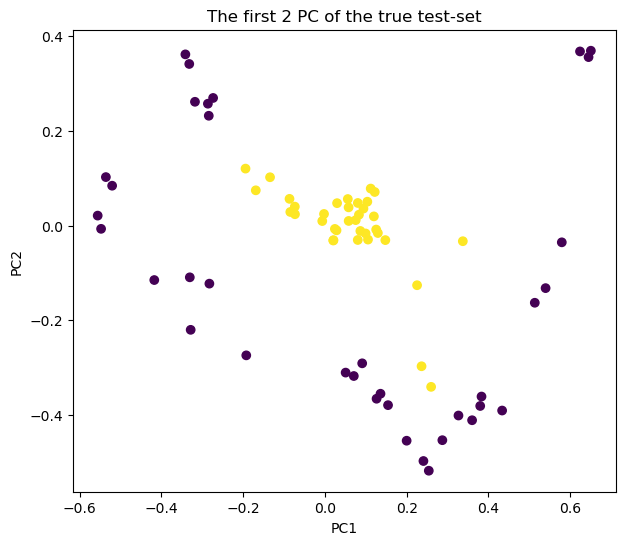

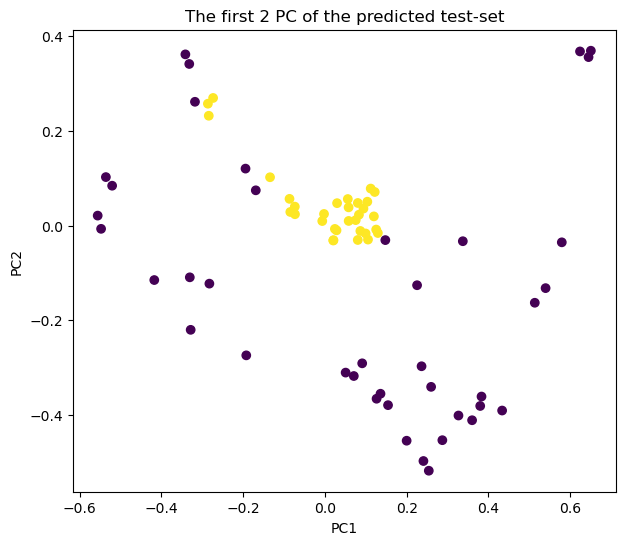

Confusion Matrix:



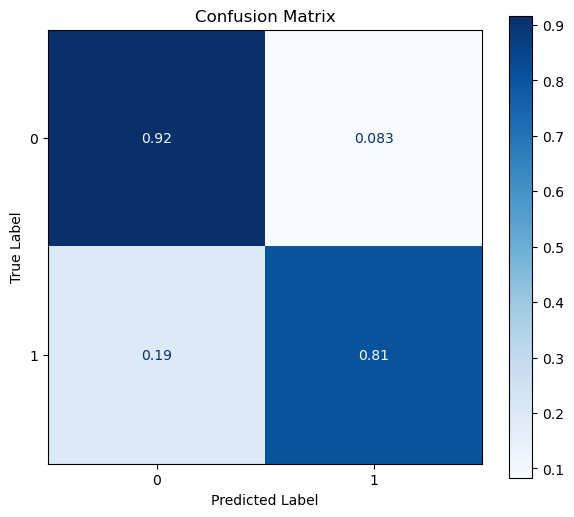

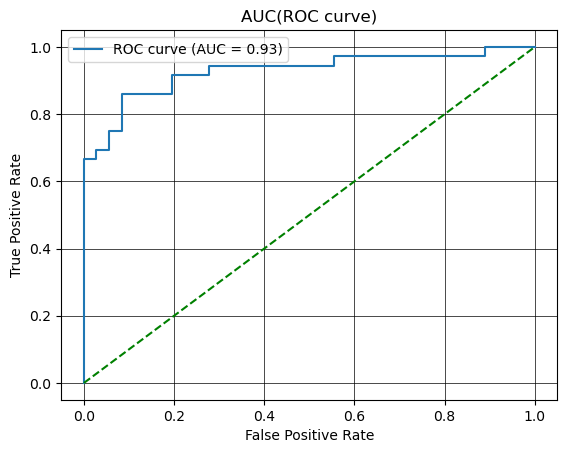



AUC-ROC: 0.9282
Accuracy: 0.8611
F1 Score: 0.8529
Precision: 0.9062
Recall: 0.8056


In [6]:
# # PCA
# function_AD('pca', X_train, y_train, X_test, y_test, contamination=contamination)

# KPCA
function_AD('kpca', X_train, y_train, X_test, y_test, contamination=contamination)

# Parameter Analysis (STILL WORKING ON THAT)

After choosing the Dataset you want here you can do a parameter analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Best parameters and scores for PCA:
best_auc = 0.0
best_f1 = 0.0
optimum_gamma = 0.0
# optimum_degree = 0
optimum_kernel = ''
optimum_n_components = 0

# Parameters to iterate over
kernels = ['poly', 'rbf', 'sigmoid']
gammas = np.logspace(-2, 2, num=100, base=10)
# degrees = np.arange(2, 6)
nn_components = np.arange(2, 101, 5)

# Initialize lists to store successful parameters and scores
f1_scores_list = []
auc_scores_list = []
gammas_list = []
# degrees_list = []
n_components_list = []
kernels_list = []

for kernel in kernels:
    for n_components in nn_components:
        for gamma in gammas:
            # for degree in degrees:
                try:  # Add a try-except block to avoid breaking the loop
                    new_auc, new_f1 = function_AD('kpca', X_train, y_train, X_test, y_test,
                                                  n_components=n_components,
                                                  analysis=True,
                                                  kernel=kernel,
                                                  gamma=gamma,
                                                #   degree=degree,
                                                  contamination=contamination
                                                  )
                    # Append successful parameters and scores to the lists
                    f1_scores_list.append(new_f1)
                    auc_scores_list.append(new_auc)
                    gammas_list.append(gamma)
                    # degrees_list.append(degree)
                    n_components_list.append(n_components)
                    kernels_list.append(kernel)

                    if new_f1 > best_f1:
                        best_auc = new_auc
                        best_f1 = new_f1
                        optimum_gamma = gamma
                        # optimum_degree = degree
                        optimum_kernel = kernel
                        optimum_n_components = n_components
                except Exception as e:
                    # print(f'An error occurred: {e}. Skipping this set of parameters.')
                    continue  # continue with the next iteration if an error occurred

# Convert lists to numpy arrays after finishing the loops
f1_scores = np.array(f1_scores_list)
auc_scores = np.array(auc_scores_list)
gammas = np.array(gammas_list)
# degrees = np.array(degrees_list)
n_components = np.array(n_components_list)
kernels = np.array(kernels_list)

In [2]:
# create pandas dataframes
df_f1 = pd.DataFrame({
    'Gamma': gammas_list,
    'Kernel': kernels_list,
    'Components': n_components_list,
    'F1_Score': f1_scores_list
})

df_auc = pd.DataFrame({
    'Gamma': gammas_list,
    'Kernel': kernels_list,
    'Components': n_components_list,
    'AUC_Score': auc_scores_list
})

NameError: name 'pd' is not defined

In [ ]:
df_f1.shape

(4000, 4)

In [ ]:
# plot AUC heatmap
for kernel in kernels:
    plt.figure(figsize=(10,10))
    df_auc_kernel = df_auc[df_auc['Kernel'] == kernel]
    df_auc_pivot = df_auc_kernel.pivot('Components', 'Gamma', 'AUC_Score')
    sns.heatmap(df_auc_pivot, cmap='hot', cbar_kws={'label': 'AUC_Score'})
    plt.title(f'AUC heatmap for {kernel} kernel')
    plt.xlabel('Gamma')
    plt.ylabel('Components')
    plt.show()

In [ ]:

# plot F1-score heatmap
for kernel in kernels:
    plt.figure(figsize=(10,10))
    df_f1_kernel = df_f1[df_f1['Kernel'] == kernel]
    df_f1_pivot = df_f1_kernel.pivot('Components', 'Gamma', 'F1_Score')
    sns.heatmap(df_f1_pivot, cmap='hot', cbar_kws={'label': 'F1_Score'})
    plt.title(f'F1-score heatmap for {kernel} kernel')
    plt.xlabel('Gamma')
    plt.ylabel('Components')
    plt.show()



In [217]:
# Best gamma and number of components for KPCA:
best_auc = 0.0
best_f1 = 0.0
optimum_gamma = 0.0
optimum_kernel = ''
optimum_n_components = 0

kernels = ['rbf'#, 'poly'
]
gammas = np.logspace(-2, 2, num=100, base=10)
nn_components = np.arange(2, 101, 5)

f1_scores = np.zeros((len(nn_components), len(gammas)))
auc_scores = np.zeros((len(nn_components), len(gammas)))

for kernel in kernels:
    for i, n_components in enumerate(nn_components):
        for j, gamma in enumerate(gammas):
            new_auc, new_f1 = function_AD('kpca', X_train, y_train, X_test, y_test,
                                          n_components=n_components,
                                          analysis=True,
                                          kernel=kernel,
                                          gamma=gamma,
                                          contamination=contamination
                                          )
            f1_scores[i,j] = new_f1
            auc_scores[i,j] = new_auc

            if new_f1 > best_f1:
                best_auc = new_auc
                best_f1 = new_f1
                optimum_gamma = gamma
                optimum_kernel = kernel
                optimum_n_components = n_components

print("Best AUC: ", best_auc)
print("Best F1: ", best_f1)
print("Optimum Kernel: ", optimum_kernel)
print("Optimum Number of Components: ", optimum_n_components)
print("Optimum Gamma: ", optimum_gamma)



Best AUC:  0.99
Best F1:  0.975609756097561
Optimum Kernel:  rbf
Optimum Number of Components:  2
Optimum Gamma:  0.01


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Best parameters and scores for PCA:
best_auc = 0.0
best_f1 = 0.0
optimum_gamma = 0.0
optimum_kernel = ''
optimum_n_components = 0

# Parameters to iterate over
kernels = ['poly', 'rbf', 'sigmoid']
gammas = np.logspace(-2, 2, num=100, base=10)
nn_components = np.arange(2, 101, 5)

# Initialize lists to store successful parameters and scores
f1_scores_list = []
auc_scores_list = []
gammas_list = []
n_components_list = []
kernels_list = []

for kernel in kernels:
    for n_components in nn_components:
        for gamma in gammas:
            try:  # Add a try-except block to avoid breaking the loop
                new_auc, new_f1 = function_AD('kpca', X_train, y_train, X_test, y_test,
                                              n_components=n_components,
                                              analysis=True,
                                              kernel=kernel,
                                              gamma=gamma,
                                              contamination=contamination
                                              )
                # Append successful parameters and scores to the lists
                f1_scores_list.append(new_f1)
                auc_scores_list.append(new_auc)
                gammas_list.append(gamma)
                n_components_list.append(n_components)
                kernels_list.append(kernel)

                if new_f1 > best_f1:
                    best_auc = new_auc
                    best_f1 = new_f1
                    optimum_gamma = gamma
                    optimum_kernel = kernel
                    optimum_n_components = n_components
            except Exception as e:
                continue  # continue with the next iteration if an error occurred

# create pandas dataframes
df_f1 = pd.DataFrame({
    'Gamma': gammas_list,
    'Kernel': kernels_list,
    'Components': n_components_list,
    'F1_Score': f1_scores_list
})

df_auc = pd.DataFrame({
    'Gamma': gammas_list,
    'Kernel': kernels_list,
    'Components': n_components_list,
    'AUC_Score': auc_scores_list
})

# plot AUC heatmap
for kernel in kernels:
    plt.figure(figsize=(10,10))
    df_auc_kernel = df_auc[df_auc['Kernel'] == kernel]
    df_auc_pivot = df_auc_kernel.pivot('Components', 'Gamma', 'AUC_Score')
    sns.heatmap(df_auc_pivot, cmap='hot', cbar_kws={'label': 'AUC_Score'})
    plt.title(f'AUC heatmap for {kernel} kernel')
    plt.xlabel('Gamma')
    plt.ylabel('Components')
    plt.show()

# plot F1-score heatmap
for kernel in kernels:
    plt.figure(figsize=(10,10))
    df_f1_kernel = df_f1[df_f1['Kernel'] == kernel]
    df_f1_pivot = df_f1_kernel.pivot('Components', 'Gamma', 'F1_Score')
    sns.heatmap(df_f1_pivot, cmap='hot', cbar_kws={'label': 'F1_Score'})
    plt.title(f'F1-score heatmap for {kernel} kernel')
    plt.xlabel('Gamma')
    plt.ylabel('Components')
    plt.show()


TypeError: Invalid shape (4000,) for image data

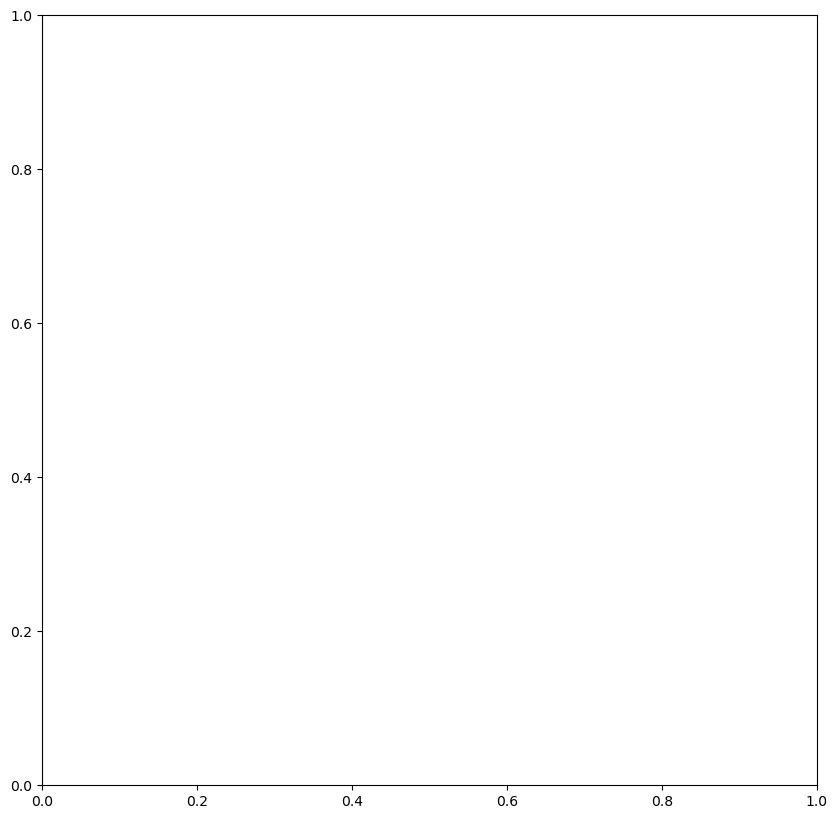

In [13]:
x_step_size = 30
y_step_size = 10

plt.figure(figsize=(10,10))
plt.imshow(f1_scores, cmap='hot', interpolation='nearest', aspect='auto')
plt.title('F1-score heatmap')
plt.xlabel('Gamma')
plt.ylabel('Number of components')
plt.xticks(range(0, len(gammas), x_step_size), gammas[::x_step_size])
plt.yticks(range(0, len(nn_components), y_step_size), nn_components[::y_step_size])
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(auc_scores, cmap='hot', interpolation='nearest', aspect='auto')
plt.title('AUC heatmap')
plt.xlabel('Gamma')
plt.ylabel('Number of components')
plt.xticks(range(0, len(gammas), x_step_size), gammas[::x_step_size])
plt.yticks(range(0, len(nn_components), y_step_size), nn_components[::y_step_size])
plt.colorbar()
plt.show()